# 导入必要的库文件：

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),          # 将图像转为 Tensor，并归一化到 [0, 1]
    transforms.Normalize((0.1307,), (0.3081,))  # 标准化
])

# 加载数据集

In [5]:
train_dataset = datasets.MNIST(
    root='./data',          # 数据集保存路径
    train=True,             # 加载训练集
    download=True,          # 如果数据集不存在，则下载
    transform=transform     # 应用定义的数据预处理
)
test_dataset = datasets.MNIST(
    root='./data',          # 数据集保存路径
    train=False,           # 加载测试集
    download=True,          # 如果数据集不存在，则下载
    transform=transform     # 应用定义的数据预处理
)

# 下面验证一下这个dataset的特性：
## data 和 targets 是两个tensor类型

In [11]:
print(train_dataset.data.shape)

torch.Size([60000, 28, 28])


In [12]:
print(train_dataset.targets.shape)

torch.Size([60000])


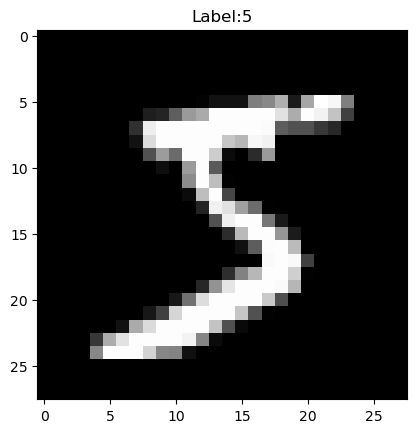

In [15]:
image = train_dataset.data[0].numpy()
plt.imshow(image,cmap = 'gray')
plt.title(f"Label:{train_dataset.targets[0]}")
plt.show()

## dataset的通用方法：__len__ __getitem__

In [18]:
print(train_dataset.len())#错误示范

AttributeError: 'MNIST' object has no attribute 'len'

In [20]:
print(len(train_dataset))#内置的__len__使得可以使用此函数获取尺寸

60000


In [29]:
print(train_dataset[0][0][0][0][0])#getitem使得一个对象能使用【】来获取其中某个元素

tensor(-0.4242)


# 加载器

## 先介绍一下迭代器的基础概念：（需要的时候打开看，平时折叠起来把）


包含 __iter__() 和 __next__() 两个特殊方法。
迭代器（Iterator）是 Python 中一个非常重要的基础概念，它为我们提供了一种统一的方式来遍历各种可迭代对象。下面从迭代器的定义、工作原理、创建和使用等方面进行详细介绍。

### 定义
迭代器是一种对象，它实现了迭代器协议，即包含 `__iter__()` 和 `__next__()` 两个特殊方法。迭代器可以用来逐个访问容器（如列表、元组、字典等）中的元素，并且能够记住当前遍历的位置。

### 工作原理
- **`__iter__()` 方法**：该方法返回迭代器对象本身，它使得对象可以在 `for` 循环等迭代场景中使用。
- **`__next__()` 方法**：该方法返回迭代器的下一个元素。当没有更多元素时，会抛出 `StopIteration` 异常，以此来表示迭代结束。

### 创建迭代器
在 Python 中，有多种方式可以创建迭代器：

#### 1. 使用内置的 `iter()` 函数
可以使用 `iter()` 函数将可迭代对象（如列表、元组、字符串等）转换为迭代器。示例如下：
```python
my_list = [1, 2, 3, 4, 5]
my_iterator = iter(my_list)

# 使用 next() 函数逐个获取元素
print(next(my_iterator))  # 输出: 1
print(next(my_iterator))  # 输出: 2
```

#### 2. 自定义迭代器类
可以通过定义一个类并实现 `__iter__()` 和 `__next__()` 方法来创建自定义的迭代器。示例如下：
```python
class MyIterator:
    def __init__(self, start, end):
        self.current = start
        self.end = end

    def __iter__(self):
        return self

    def __next__(self):
        if self.current < self.end:
            value = self.current
            self.current += 1
            return value
        else:
            raise StopIteration

# 创建自定义迭代器对象
my_iter = MyIterator(0, 3)

# 使用 next() 函数逐个获取元素
print(next(my_iter))  # 输出: 0
print(next(my_iter))  # 输出: 1
print(next(my_iter))  # 输出: 2
try:
    print(next(my_iter))  # 抛出 StopIteration 异常
except StopIteration:
    print("迭代结束")
```

### 迭代器的使用场景
#### 1. `for` 循环
`for` 循环在底层使用了迭代器来遍历可迭代对象。例如：
```python
my_list = [1, 2, 3, 4, 5]
for item in my_list:
    print(item)
```
在这个例子中，`for` 循环会自动调用 `iter(my_list)` 将列表转换为迭代器，然后不断调用 `next()` 方法获取元素，直到抛出 `StopIteration` 异常。

#### 2. 生成器表达式
生成器表达式是一种简洁的创建迭代器的方式。示例如下：
```python
my_generator = (x * 2 for x in range(5))
for item in my_generator:
    print(item)
```
这里的 `(x * 2 for x in range(5))` 就是一个生成器表达式，它返回一个迭代器，通过 `for` 循环可以逐个获取元素。

### 迭代器的优点
- **节省内存**：迭代器是惰性求值的，即只有在需要时才会生成下一个元素，不需要一次性将所有元素加载到内存中，因此可以处理大规模的数据。
- **统一的遍历方式**：迭代器提供了一种统一的方式来遍历各种可迭代对象，使得代码更加简洁和通用。

总之，迭代器是 Python 中一个强大且基础的概念，理解和掌握迭代器的使用对于编写高效、简洁的 Python 代码非常重要。 

## 介绍一下dataloader

In [7]:
train_loader = torch.utils.data.DataLoader(
    train_dataset, 
    batch_size=64,  # 每批加载 64 张图像
    shuffle=True    # 打乱数据顺序
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, 
    batch_size=1000,  # 每批加载 1000 张图像
    shuffle=False     # 测试集不需要打乱顺序
)

torch.Size([64, 1, 28, 28])
torch.Size([64])


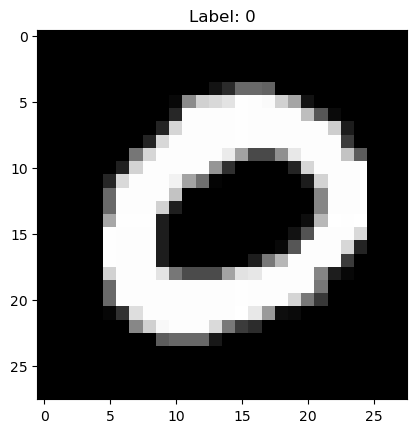

In [9]:
# 从 train_loader 中取一个 batch
images, labels = next(iter(train_loader))

# 打印图像和标签的形状
print(images.shape)  # 输出: torch.Size([64, 1, 28, 28])
print(labels.shape)  # 输出: torch.Size([64])

# 显示第一张图像
import matplotlib.pyplot as plt
plt.imshow(images[0].squeeze(), cmap='gray')  # squeeze() 去掉通道维度
plt.title(f"Label: {labels[0]}")
plt.show()

# 定义神经网络：

In [31]:
class MNISTclassifyer(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28,100) #不加self导致局部变量，会使得其他方法如forward无法使用它们
        self.fc2 = nn.Linear(100,100)
        self.fc3 = nn.Linear(100,10)
    def forward(self,x): #若把 forward 方法的名称写成 foward 这种错误的形式，会导致一系列问题：e.g. 无法直接调用模型实例
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)#不加relu，因为要用cross en loss
        return x
        
        

In [34]:
classifyer = MNISTclassifyer()
print(classifyer(torch.randn(1,1,28,28)))#测试一下这个网络是不是能用的

tensor([[ 0.0377, -0.0101, -0.2376,  0.2009, -0.0737,  0.1727,  0.0468,  0.0218,
         -0.0259, -0.0271]], grad_fn=<AddmmBackward0>)
